In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
feature_name_df = pd.read_csv('human_activity/features.txt',
                            sep='\s+',
                            header=None,
                            names=['column_index','column_name'])

In [3]:
feature_name_df.head(2)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y


In [4]:
feature_name = feature_name_df.iloc[:,1].values.tolist()

In [5]:
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [6]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df.head(2)

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1


In [7]:
feature_dup_df[feature_dup_df['column_index']>1].count()

column_index    42
dtype: int64

In [8]:
def get_new_df(old_df):
    dup_df = pd.DataFrame(data=old_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    dup_df = dup_df.reset_index()
    new_df = pd.merge(old_df.reset_index(),dup_df,how='outer')
    new_df['column_name'] = new_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1]>0 else x[0]   ,axis=1)
    new_df.drop(columns=['index'],inplace=True)
    return new_df

In [9]:
df = get_new_df(feature_name_df)
df.head(2)

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0


In [10]:
df[df['dup_cnt']>0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


In [11]:
def get_human_dataset():
    feature_name_df = pd.read_csv('human_activity/features.txt',
                            sep='\s+',
                            header=None,
                            names=['column_index','column_name'])
    name_df = get_new_df(feature_name_df)
    feature_name = name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv('human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    y_train = pd.read_csv('human_activity/train/y_train.txt',sep='\s+',names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt',sep='\s+',names=['action'])
    return X_train,X_test,y_train,y_test    

In [12]:
X_train,X_test,y_train,y_test = get_human_dataset()

In [13]:
X_train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317


In [14]:
y_train.head(2)

,action
0,5
1,5


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [17]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
dt_clf =DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test,pred)

0.8547675602307431

In [20]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [21]:
from sklearn.model_selection import GridSearchCV

In [23]:
%%time
params = {
    'max_depth': [6,8,10,12,16,20,24],
    'min_samples_split': [16],
}
grid_cv = GridSearchCV(dt_clf,params,scoring='accuracy',cv=5,verbose=1)

grid_cv.fit(X_train,y_train)

In [25]:
grid_cv.best_score_

0.8548794147162603

In [26]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [28]:
cv_result = pd.DataFrame(grid_cv.cv_results_)

In [30]:
cv_result[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [31]:
max_depth = [6,8,10,12,16,20,24]
for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth,min_samples_split=16,random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accurary = accuracy_score(y_test,pred)
    print(f'max_depth:{depth}  정확도:{accurary:.4f}')

max_depth:6  정확도:0.8551
max_depth:8  정확도:0.8717
max_depth:10  정확도:0.8599
max_depth:12  정확도:0.8571
max_depth:16  정확도:0.8599
max_depth:20  정확도:0.8565
max_depth:24  정확도:0.8565


In [35]:
%%time
params = {
    'max_depth': [8],
    'min_samples_split': [8, 12, 16, 20, 24],
}
grid_cv = GridSearchCV(dt_clf,params,scoring='accuracy',cv=5,verbose=1)

grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 51.1 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24,
                                              min_samples_split=16,
                                              random_state=156),
             param_grid={'max_depth': [8],
                         'min_samples_split': [8, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [36]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [37]:
grid_cv.best_score_

0.8548794147162603

In [38]:
pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test,pred)

0.8717339667458432

In [42]:
data = pd.Series(grid_cv.best_estimator_.feature_importances_,index=X_train.columns)

In [46]:
top10 = data.sort_values(ascending=False)[:10]

In [47]:
import seaborn as sns

<AxesSubplot:>

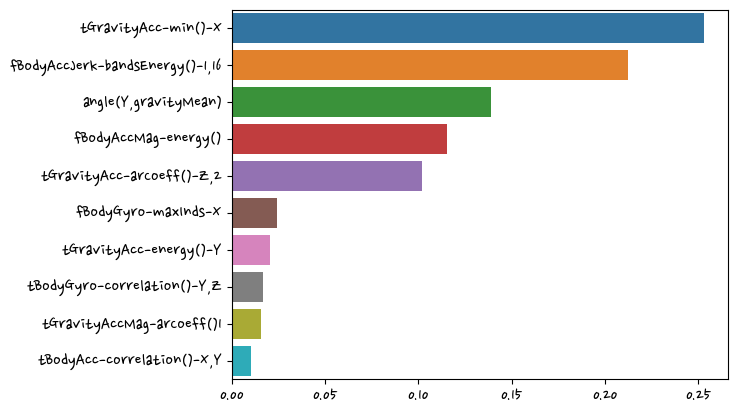

In [48]:
sns.barplot(x=top10,y=top10.index)